In [2]:
import os                                 
import cartopy.crs as ccrs                
import cartopy                            
import numpy as np                        
import numpy.ma as ma                     
import glob                               
import xarray as xr                       
import sys                                
import pandas as pd                       
from matplotlib import pyplot as plt      
import matplotlib.colors as colors        
import cmocean                            
import VerticalSplitScale                 

In [4]:
df1 = xr.open_dataset('/archive2/milicak/mitgcm/sose/Exp01_0/Exp01_0_sigma2_mean_time_zonal.nc')
df2 = xr.open_dataset('/archive2/milicak/mitgcm/sose/Exp02_0/Exp02_0_sigma2_mean_time_zonal.nc')
df3 = xr.open_dataset('/archive2/milicak/mitgcm/sose/Exp03_0/Exp03_0_sigma2_mean_time_zonal.nc')
gr = xr.open_dataset('/archive2/milicak/mitgcm/sose/Exp01_0/grid.nc')           
                                                                                
conts = np.arange(33,38.25,0.25)  

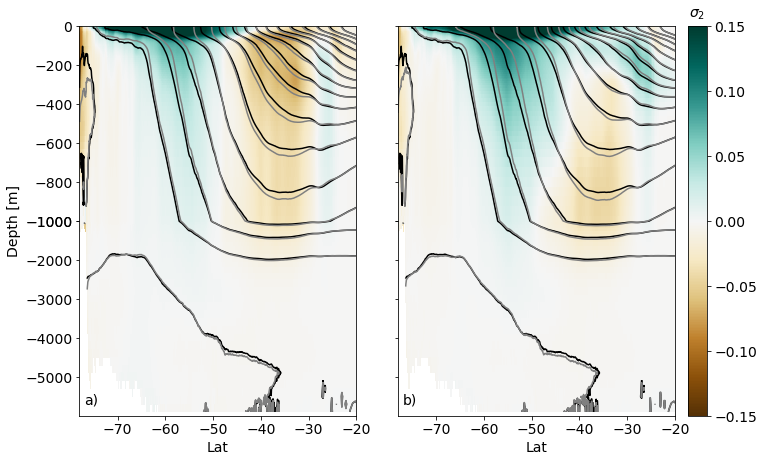

In [7]:
fig, axes = plt.subplots(figsize=(9,6))           
ax1 = plt.subplot2grid(shape=(1,4),loc=(0,0),     
                       colspan=2)                 
ax2 = plt.subplot2grid(shape=(1,4),loc=(0,2),     
                       colspan=2)                 
                                                  
plt.tight_layout()                                
c1 = ax1.pcolormesh(gr.YC,gr.Z,df2.sigma2-df1.sigma2,vmin=-0.15,vmax=0.15,cmap='BrBG',shading='auto');
ax1.contour(gr.YG,gr.Z,df1.sigma2, conts, colors='k')      
ax1.contour(gr.YG,gr.Z,df2.sigma2, conts, colors='grey')   
ax1.set_xlim(-78,-20);                                                          
ax1.tick_params(labelsize=14)                                                   
ax1.set_ylabel('Depth [m]',fontsize=14)                                         
ax1.text(-77,-5700,'a)',fontsize=14)                                            
ax1.set_yticks([-6000,-5000,-4000,-3000,-2000,-1000,0]);                        
ax1.set_yscale("splitscale", zval=[0.,-1000.,-6000.])                           
ax1.invert_yaxis()                                                              
ax1.set_xlabel('Lat',fontsize=14)                                               
                                                                                
c2 = ax2.pcolormesh(gr.YC,gr.Z,df3.sigma2-df1.sigma2,vmin=-0.15,vmax=0.15,cmap='BrBG',shading='auto');
ax2.contour(gr.YG,gr.Z,df1.sigma2, conts, colors='k')      
ax2.contour(gr.YG,gr.Z,df3.sigma2, conts, colors='grey')   
ax2.set_xlim(-78,-20);                                                          
axpos = ax2.get_position()                                                      
cbar_ax = fig.add_axes([axpos.x1+0.02,axpos.y0,0.03,axpos.height])              
cbar = fig.colorbar(c2, cax=cbar_ax, ticklocation='right')                      
ax2.tick_params(labelsize=14)                                                   
ax2.set_yticklabels([]);                                                        
ax2.text(-77,-5700,'b)',fontsize=14)                                            
cbar.ax.tick_params(labelsize=14)                                               
ax2.set_yticks([-6000,-5000,-4000,-3000,-2000,-1000,0]);                        
cbar.set_label('$\sigma_2$',rotation=0,y=1.05,labelpad=-60,fontsize=14)         
ax2.set_yscale("splitscale", zval=[0.,-1000.,-6000.])                           
ax2.invert_yaxis()                                                              
ax2.set_xlabel('Lat',fontsize=14);                                               


In [9]:
plt.savefig('paperfigs/mean_sigma2_diff_mean.png', bbox_inches='tight',format='png',dpi=300)

<Figure size 432x288 with 0 Axes>